In [149]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv("./spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [152]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [153]:
df.shape

(5572, 3)

In [154]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<h3>Train test split</h3>

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

<h3>Create bag of words representation using CountVectorizer</h3>

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7673 sparse matrix of type '<class 'numpy.int64'>'
	with 59030 stored elements in Compressed Sparse Row format>

In [157]:
v.vocabulary_

{'and': 948,
 'he': 3349,
 'apparently': 1006,
 'bffs': 1316,
 'with': 7475,
 'carly': 1648,
 'quick': 5485,
 'now': 4786,
 'they': 6785,
 'released': 5634,
 'another': 967,
 'italian': 3741,
 'one': 4887,
 'today': 6879,
 'it': 3740,
 'has': 3324,
 'cosign': 1990,
 'option': 4920,
 'lol': 4150,
 'was': 7324,
 'gonna': 3164,
 'last': 3987,
 'month': 4532,
 'cashed': 1657,
 'some': 6253,
 'in': 3627,
 'but': 1560,
 'left': 4033,
 'lt': 4216,
 'gt': 3242,
 'just': 3849,
 'case': 1655,
 'collecting': 1868,
 'more': 4538,
 'during': 2469,
 'the': 6759,
 'week': 7369,
 'cause': 1669,
 'announced': 961,
 'on': 4883,
 'blog': 1374,
 'anything': 987,
 'lor': 4171,
 'decide': 2169,
 'send': 5973,
 'logo': 4146,
 'ur': 7139,
 'lover': 4197,
 'names': 4638,
 'joined': 3813,
 'by': 1573,
 'heart': 3365,
 'txt': 7036,
 'love': 4192,
 'name1': 4635,
 'name2': 4636,
 'mobno': 4505,
 'eg': 2518,
 'adam': 795,
 'eve': 2639,
 '07123456789': 26,
 'to': 6875,
 '87077': 677,
 'yahoo': 7594,
 'pobox36504w45

<h3>Train the naive bayes model</h3>

In [158]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [159]:
X_test_cv = v.transform(X_test)

<h3>Evaluate Performance</h3>

In [160]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       953
           1       0.97      0.93      0.95       162

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



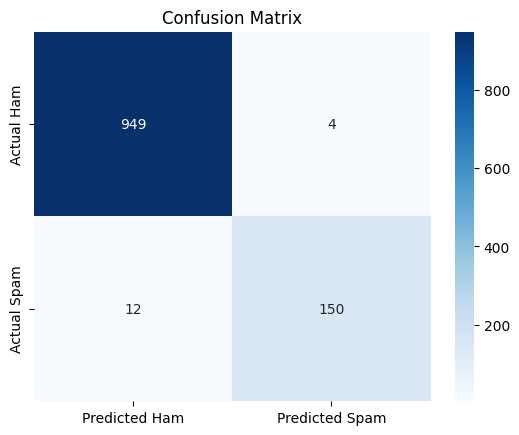

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix')
plt.show()

### Test

In [162]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Извлечение данных
X = df['Message']
y = df['Category']

# Создание TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение наивного байесовского классификатора
model = make_pipeline(tfidf_vectorizer, MultinomialNB())
model.fit(X_train, y_train)

# Оценка модели
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

accuracy


0.9766816143497757

In [164]:
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



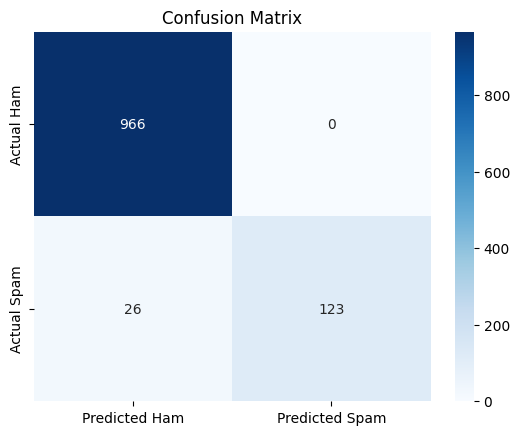

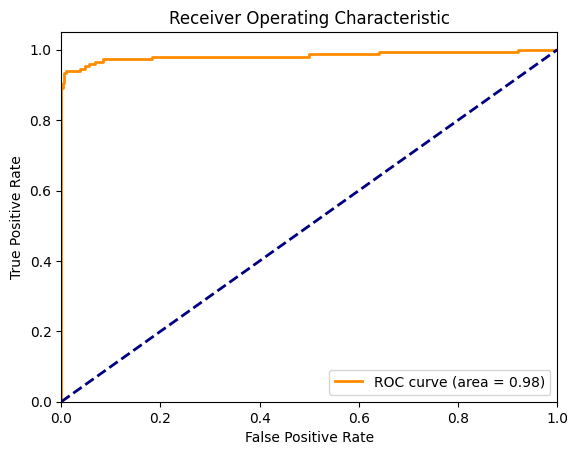

In [165]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix')
plt.show()

# ROC-кривая и AUC
y_test_binary = y_test.apply(lambda x: 1 if x == 'spam' else 0)
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
